# Information
$Writer: Junhyuck\ Woo$ <br>
$Std.ID: 20145337$<br>
$Assignment03:\ Linear\ regression\ with\ multiple\ variables$<br>
$Deadline: Apr\ 16, 2020$
<hr>

# Library

In [0]:
import matplotlib.pyplot as plt; import numpy as np; import csv

#Data - Train


In [0]:
path="/content/drive/My Drive/Spring|2020/Machine_Learning/CAU-MachineLearning/Assignment04/data_train.csv"

x = []; y = []; z = []; h = [];

with open(path, newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0
    for i in reader:
        x.append(float(i[0]))
        y.append(float(i[1]))
        z.append(float(i[2]))
        h.append(float(i[3]))
        ct += 1

x_data = np.array(x)
y_data = np.array(y)
z_data = np.array(z)
h_data = np.array(h)
m = ct

#Data - Test

In [0]:
path="/content/drive/My Drive/Spring|2020/Machine_Learning/CAU-MachineLearning/Assignment04/data_test.csv"

x = []; y = []; z = []; h = [];

with open(path, newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0
    for i in reader:
        x.append(float(i[0]))
        y.append(float(i[1]))
        z.append(float(i[2]))
        h.append(float(i[3]))
        ct += 1

x_test = np.array(x)
y_test = np.array(y)
z_test = np.array(z)
h_test = np.array(h)

#Linear Model
$f_{\theta}(x, y, z) = {\theta}_0 + {\theta}_1x + {\theta}_1y + {\theta}_1z,$<br>
$where\ {\theta} =\ ({\theta}_0, {\theta}_1, {\theta}_2, {\theta}_3)\ and\ {\theta}_0, {\theta}_1, {\theta}_2, {\theta}_3\ {\in}\ R$<br>
${\theta}_0 = 0$<br>
${\theta}_1 = 1$<br>
${\theta}_2 = 2$<br>
${\theta}_3 = 3$

In [0]:
theta0 = -1; theta0_old = 0
theta1 = 1; theta1_old = 0
theta2 = 2; theta2_old = 0
theta3 = 3; theta3_old = 0
theta0_history = [theta0]
theta1_history = [theta1]
theta2_history = [theta2]
theta3_history = [theta3]

f = theta0 + theta1*x_data + theta2*y_data + theta3*z_data

# Objective Function
$J({\theta}_0, {\theta}_1, {\theta}_2, {\theta}_3)=\frac{1}{2m}\sum_{i=1}^{m}{(f}_{\theta}(x^{(i)},y^{(i)},z^{(i)}){-}h^{(i)})^2$

In [163]:
j = np.sum((f - h_data)**2) / (2*m)
j_old = 0
j_history = [j]
print(j)

133831.87466031627


# Training Process - Gradient Descent
${\alpha} = 0.004$<br>
$\theta_0^{(t+1)} := {\theta}_{0}^{(t)} - {\alpha} \frac{1}{m}\sum_{i=1}^{m}{(f}_{\theta}(x^{(i)},y^{(i)},z^{(i)}){-}h^{(i)})$<br>
${\theta}_{1}^{(t+1)} := {\theta}_{1}^{(t)} - {\alpha} \frac{1}{m}\sum_{i=1}^{m}{(f}_{\theta}(x^{(i)},y^{(i)},z^{(i)}){-}h^{(i)})x^{(i)}$<br>
${\theta}_{2}^{(t+1)} := {\theta}_{2}^{(t)} - {\alpha} \frac{1}{m}\sum_{i=1}^{m}{(f}_{\theta}(x^{(i)},y^{(i)},z^{(i)}){-}h^{(i)})y^{(i)}$<br>
${\theta}_{3}^{(t+1)} := {\theta}_{3}^{(t)} - {\alpha} \frac{1}{m}\sum_{i=1}^{m}{(f}_{\theta}(x^{(i)},y^{(i)},z^{(i)}){-}h^{(i)})z^{(i)}$<br>

In [0]:
alpha = 0.00002

# Check the number of iteration
iteration = 1

#while iteration<100:
while  (abs(j - j_old) + abs(theta0 - theta0_old) + abs(theta1 - theta1_old) + abs(theta2 - theta2_old) + abs(theta3 - theta3_old)) > 0.000003:
    # Calculate the theta
    theta0_old = theta0
    theta1_old = theta1
    theta2_old = theta2
    theta3_old = theta3
    theta0 = theta0 - alpha*np.sum(f-h_data)/m
    theta1 = theta1 - alpha*np.sum((f-h_data)*x_data)/m
    theta2 = theta2 - alpha*np.sum((f-h_data)*y_data)/m
    theta3 = theta3 - alpha*np.sum((f-h_data)*z_data)/m

    # Update the j, h
    j_old = j
    f = theta0 + theta1*x_data + theta2*y_data + theta3*z_data
    j = np.sum((f - h_data)**2) / (2*m)

    # Record the history of parameter
    theta0_history.append(theta0)
    theta1_history.append(theta1)
    theta2_history.append(theta2)
    theta3_history.append(theta3)
    j_history.append(j)

    iteration = iteration +1
    if (iteration%100000) == 0:
        print(j_old-j)
    #print(j)


#Check the Convergence

In [168]:
# Iteration
print("# Iteration: " + str(iteration) + '\n')

# Theta 0
print("Updated Theta0: "+ str(theta0))
print("Old Theta0: " + str(theta0_old))
print("Diff: " + str(theta0 - theta0_old) + '\n')

# Theta 1
print("Updated Theta1: "+ str(theta1))
print("Old Theta1: " + str(theta1_old))
print("Diff: " + str(theta1 - theta1_old) + '\n')

# Theta 2
print("Updated Theta1: "+ str(theta2))
print("Old Theta1: " + str(theta2_old))
print("Diff: " + str(theta2 - theta2_old) + '\n')

# Theta 3
print("Updated Theta1: "+ str(theta3))
print("Old Theta1: " + str(theta3_old))
print("Diff: " + str(theta3 - theta3_old) + '\n')

# J, Energy Value
print("Updated J: "+ str(j))
print("Old J: " + str(j_old))
print("Diff: " + str(j - j_old) + '\n')

# Iteration: 6805

Updated Theta0: -1.0238386440554565
Old Theta0: -1.0238373545562747
Diff: -1.2894991818779289e-06

Updated Theta1: 0.673957534257095
Old Theta1: 0.6739105925730401
Diff: 4.6941684054946364e-05

Updated Theta1: -1.6852028121519118
Old Theta1: -1.6851595186183677
Diff: -4.329353354415311e-05

Updated Theta1: 4.016992766198962
Old Theta1: 4.016996460146566
Diff: -3.6939476038000407e-06

Updated J: 103.71768674306108
Old J: 103.71789136087843
Diff: -0.00020461781734582019



#1. Estimated Parameters

Text(0, 0.5, 'Theta Value')

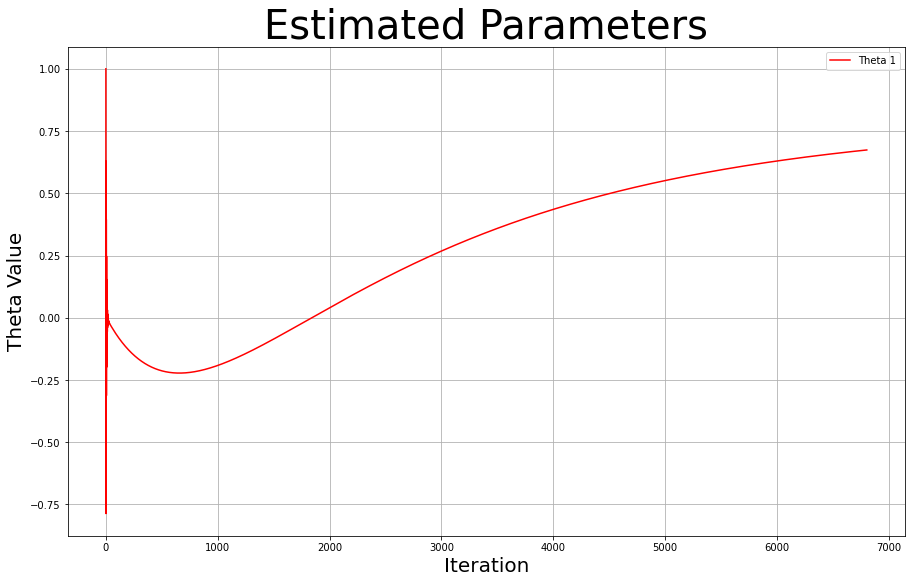

In [166]:
plt.figure(figsize=(15,9))
#plt.plot(theta0_history, color='black', label='Theta 0')
plt.plot(theta1_history, color='red', label='Theta 1')
#plt.plot(theta2_history, color='green', label='Theta 2')
#plt.plot(theta3_history, color='blue', label='Theta 3')
plt.grid()
plt.legend()
plt.title('Estimated Parameters', fontsize=40)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Theta Value', fontsize=20)

#2. Training Error

Text(0, 0.5, 'Energy Value')

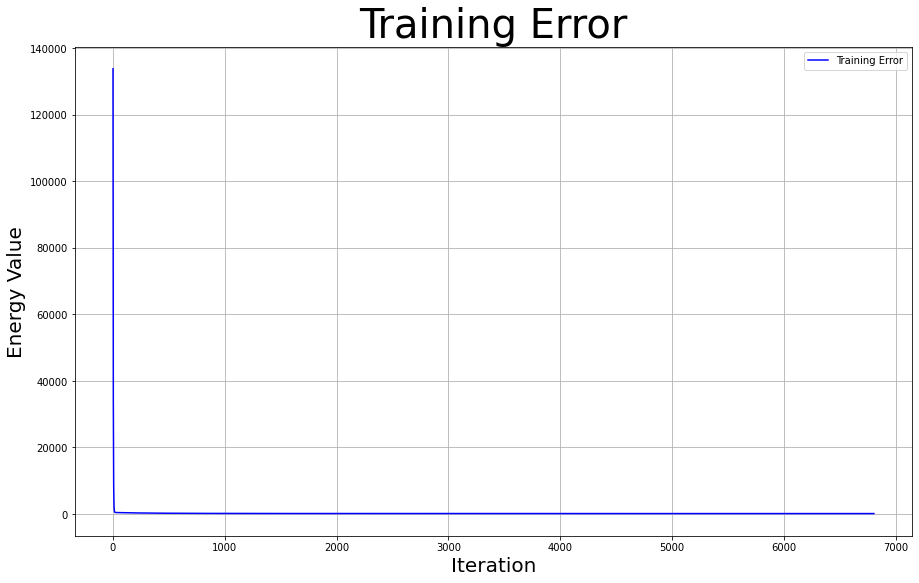

In [167]:
plt.figure(figsize=(15,9))
plt.plot(j_history, color='blue', label='Training Error')
plt.grid()
plt.legend()
plt.title('Training Error', fontsize=40)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Energy Value', fontsize=20)

#3. Testing Error

In [0]:
plt.figure(figsize=(15,9))
plt.plot(j_history[1:100], color='red', label='Training Error')
plt.grid()
plt.legend()
plt.title('Training Error', fontsize=40)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Energy Value', fontsize=20)